In [2]:
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import matplotlib.gridspec as gridspec
from matplotlib.ticker import MaxNLocator
import matplotlib.mlab as mlab
%matplotlib inline

# set fig size; bigger DPI results in bigger fig
plt.rcParams["figure.dpi"] = 150

import seaborn as sns
import pandas as pd
import numpy as np
import math
import scipy.stats as stats
from scipy.stats import norm
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import plotly.express as px
import plotly.graph_objects as go

import stemgraphic as stem
from mgt2001 import *
import mgt2001

import random
import itertools
import math
from IPython.display import display_html
plt.style.use('ggplot') # refined style


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

# Question 1  
### a.
H0 : 10 % of user of the drug experience drowsiness  
H1 : not 10 % of user of the drug experience drowsiness  
### b. and c.

In [38]:
mean = 81/900
alpha = 0.05
h0p = 0.1
nobs = 900
phead_std = (h0p*(1-h0p)/nobs)**0.5
zcv = stats.norm.ppf (1-alpha/2) # z critical value
print (f"zcv is {zcv:.4f}")
zvalue = (mean-h0p)/phead_std 
pvalue = (stats.norm.cdf (zvalue)) * 2
print (f"P-Value is {pvalue:.4f}")

zcv is 1.9600
P-Value is 0.3173


We don't have enough evidence to reject null hypothesis at 5% significance level

In [6]:
mean = 81/900
alpha = 0.05
h0p = 0.1
nobs = 900
phead_std = (h0p*(1-h0p)/nobs)**0.5
zcv = stats.norm.ppf (1-alpha/2) # z critical value
lcl = mean - zcv * phead_std
ucl = mean + zcv * phead_std
print (f"[lcl, ucl] = [{lcl:.4f}, {ucl:.4f}]")

[lcl, ucl] = [0.0704, 0.1096]


# Question 2
## a.
H0 : Variance of score is 320  
H1 : Variance is larger than 320  
## b.



In [18]:
data = np.array([72, 64, 40, 52, 92])
mean = data.mean()
std = data.std()
siglevel = 0.1
nobs = 5
print ("s^2 = ", std**2)
h0var = 320
chistat = (nobs-1) * std**2 / h0var
#print (chistat)
# Chi-Square critical value
chicv_l = stats.chi2.ppf (siglevel, nobs-1)
# S^2 Critical value
scv_l = chicv_l * h0var / (nobs-1)
#print (scv_u)
p_onetail = 1-stats.chi2.cdf (chistat, nobs-1)
print ("p-value = ",p_onetail)

s^2 =  313.6
p-value =  0.4169409259262933


In [20]:
chicv_u = stats.chi2.ppf (siglevel/2, nobs-1)
chicv_l = stats.chi2.ppf (1 - siglevel/2, nobs-1)
lcl = (nobs-1)* (std**2) / chicv_l
ucl = (nobs-1)* (std**2) / chicv_u
print (f"[lcl, ucl] = [{lcl:.4f}, {ucl:.4f}]")

[lcl, ucl] = [132.2129, 1764.9632]


# Question 3
## a.
H0 : Heartbeat after energy drink consumption is 70 bpm  
H1 : Heartbeat after energy drink consumption is bigger than 70 bpm  
## b.
test with student t distribution

In [21]:
xbar = 73
std = 7
nobs = 25
alpha = 0.1
meanh1 = 70

# t critical value
tcv = stats.t.ppf(1-alpha, df = nobs-1)
print (f"tcv = {tcv:.4f}")

# x critical value
xcv = meanh1 + tcv * std / (nobs**0.5)
print (f"xcv = {xcv:.4f}")

# p-value
tvalue = (xbar-meanh1) / (std / (nobs**0.5))
pvalue = 1- stats.t.cdf (tvalue, df = nobs-1)
print (f"p-value = {pvalue:.4f}")

tcv = 1.3178
xcv = 71.8450
p-value = 0.0212


In [23]:
lcl = xbar - tcv * std / (nobs ** 0.5)
ucl = xbar + tcv * std / (nobs ** 0.5)
print (f"[lcl, ucl] = [{lcl:.4f}, {ucl:.4f}]")

[lcl, ucl] = [71.1550, 74.8450]


# Question 4
## a.


In [28]:
xbar = 24.5
std = 4.34
nobs = 50
alpha = 0.05
meanh1 = 24

# t critical value
tcv = stats.t.ppf(1-alpha, df = nobs-1)
print (f"tcv = {tcv:.4f}")

# x critical value
xcv = meanh1 + tcv * std / (nobs**0.5)
print (f"xcv = {xcv:.4f}")

tcv = 1.6766
xcv = 25.0290


The Rejection Region is $\bar{x}$ > x<sub>cv</sub>  


In [30]:
ztype2 = (xcv - meanh1) / (std / (nobs**0.5))
type2p = 1-stats.norm.cdf(ztype2)
print (f"P(TypeII) : {type2p:.4f}")
ptest = 1 - type2p
print (f"Power of Test : {ptest:.4f}")

P(TypeII) : 0.0468
Power of Test : 0.9532


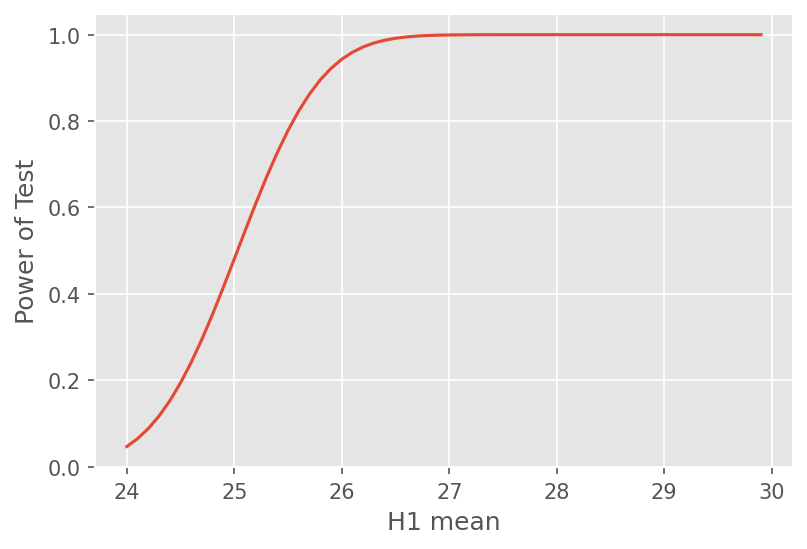

In [33]:
meanvec = np.arange (24, 30, 0.1)
betavec = np.zeros(meanvec.shape[0])
for i, meanh1 in enumerate(meanvec):
    ztype2 = (xcv - meanh1) / (std / (nobs**0.5))
    type2p = stats.norm.cdf(ztype2)
    betavec[i] = 1-type2p

_1 = plt.plot(meanvec, betavec)

#plt.legend()
plt.xlabel("H1 mean")
plt.ylabel("Power of Test")
plt.show()

# Question 5
Type I Error is rejecting a true null hypothesis  
we will NOT reject whenever  
3/4 <= X1+X2 <= 5/4  



# Question 6

In [36]:
df1 = pd.read_csv('ds_1.csv')
std = df1['Cigarettes'].std()
mean = df1['Cigarettes'].mean()
siglevel = 0.05
nobs = df1.shape[0]

tcv = stats.t.ppf (1 - siglevel/2, df = nobs-1)

lcl = mean - tcv * std / (nobs ** 0.5)
ucl = mean + tcv * std / (nobs ** 0.5)
print (f"[lcl, ucl] = [{500000000*lcl:.4f}, {500000000*ucl:.4f}]")

[lcl, ucl] = [8233460705.2889, 8770539294.7111]


# Question 7

In [37]:
df2 = pd.read_csv('ds_2.csv')
mean = df2['BP'].mean()
std = df2 ['BP'].std()
siglevel = 0.05
nobs = df2.shape[0]

chicv_u = stats.chi2.ppf (siglevel/2, nobs-1)
chicv_l = stats.chi2.ppf (1 - siglevel/2, nobs-1)
lcl = (nobs-1)* (std**2) / chicv_l
ucl = (nobs-1)* (std**2) / chicv_u
print (f"[lcl, ucl] = [{lcl:.4f}, {ucl:.4f}]")

[lcl, ucl] = [11.9967, 38.0803]
